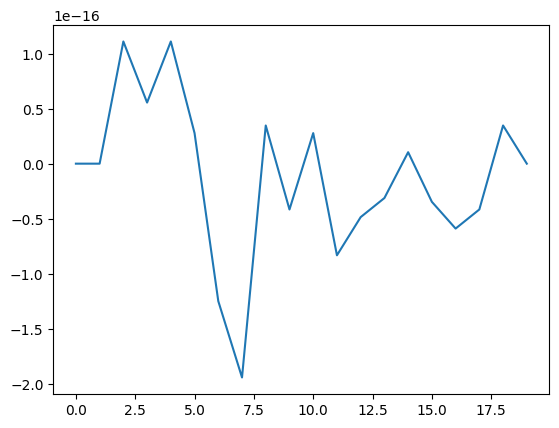

In [102]:
import matplotlib.pyplot as plt
import numpy as np

#N = "growth", V = # vertices, E = # edges, edges -> adjacency list
N = 2
V = int(3 * (2**N) - 2)
E = int(3 * V / 2)
J = 1
k_B = 1
t = 1
edges = np.full((V, 3), -1)
microstate = np.empty((2**V, V))
energy = np.empty(2**V)

#main code area
initMicrostate()
initEdges()
initEnergy()
plotMag(20)

In [94]:
#init microstate
def initMicrostate():
  for i in range(2**V):
    binRep = np.array(list(np.binary_repr(i, width=V)[0:]), dtype=int)
    for d in binRep:
      if d == 0:
        binRep[binRep == 0] = -1
      else:
        binRep[binRep == 1] = 1
    microstate[i] = binRep;

#init adjacency list: should be like heap
def initEdges():
  for i in range(V):
    if i == 0:
      edges[i] = [1,2,3]
    elif i < (V-1) // 2:
      for j in range(2):
        edges[i][j] = 2 * (i + 1) + j
    else:
      if i + 1 == V:
        edges[i][0] = 0
      else:
        edges[i][0] = i+1

#init hamiltonian values beforehand
def initEnergy():
  for i in range(2**V):
    ham = 0
    for j in range(V):
      for k in range(3):
        if(edges[j][k] != -1):
          ham -= J * microstate[i][j] * microstate[i][edges[j][k]]
    energy[i] = ham

def Z(T):
  Z = 0
  for i in range(2**V):
    Z += np.exp(-energy[i]/ (k_B * T))
  return Z

def P_a(i, T):
  return np.exp(-energy[i] / (k_B * T)) / Z(T)

def M_a(i):
  m = 0
  for j in range(V):
    m += microstate[i][j]
  return m

def totM(T):
  totM = 0;
  for i in range(2**V):
    totM += M_a(i) * P_a(i, T)
  return totM

def plotMag(T_i, T_f):
  mag = np.empty(T_f - T_i)
  for i in range(T_i, T_f-1):
    mag[i] = totM(i+1)
  plt.plot(mag)
  plt.show()
